In [1]:
# ensures all output is printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from  matplotlib.ticker import PercentFormatter
import scipy
from scipy import stats
import seaborn as sns 
from IPython.display import display, HTML

# Load Data

In [3]:
# Load Data
survey = pd.read_csv('CompleteResponses.csv', header =0)

In [4]:
survey.head()

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0


In [5]:
survey.describe(include ='all')

,salary,age,elevel,car,zipcode,credit,brand
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,84870.862257,49.778642,1.982926,10.521924,4.040816,249175.966620,0.621742
std,37712.340836,17.596685,1.420562,5.771435,2.582058,145211.572531,0.484977
min,20000.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,52082.106040,35.000000,1.000000,6.000000,2.000000,120806.813900,0.000000
50%,84949.735155,50.000000,2.000000,11.000000,4.000000,250607.146100,1.000000
75%,117162.043375,65.000000,3.000000,15.750000,6.000000,374639.701800,1.000000
max,150000.000000,80.000000,4.000000,20.000000,8.000000,500000.000000,1.000000


In [6]:
survey.columns

Index(['salary', 'age', 'elevel', 'car', 'zipcode', 'credit', 'brand'], dtype='object')

## Convert Categorical Variables that are Numeric Types into Category Types

In [13]:
# Convert categorical variables that are inputted as numeric into categorical types

cat_dtype = pd.api.types.CategoricalDtype(
    categories=[0,1,2,3,4], ordered=True)

survey['elevel'] = survey.elevel.astype(cat_dtype)
survey['car'] = survey.car.astype('category')
survey['zipcode'] = survey.zipcode.astype('category')
survey['brand'] = survey.brand.astype('category')

## Missing Values?

In [9]:
# zeros
print((survey[survey.columns] == 0).sum())

salary        0
age           0
elevel     2052
car           0
zipcode    1085
credit      119
brand      3744
dtype: int64


In [10]:
# Nulls, NaNs
print(survey.isnull().sum())

salary     0
age        0
elevel     0
car        0
zipcode    0
credit     0
brand      0
dtype: int64


# Univariate Analysis

In [35]:
# only prints last output
InteractiveShell.ast_node_interactivity = "last_expr"

## Age

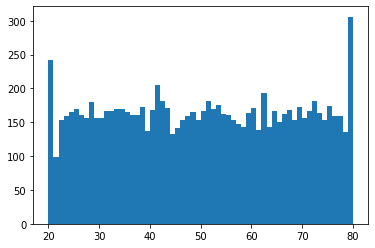

In [45]:
# histogram
plt.hist(survey['age'], bins=60)
plt.show()

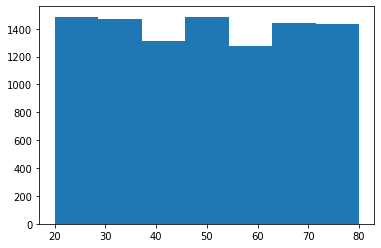

In [47]:
# histogram
plt.hist(survey['age'], bins=7)
plt.show()

## Salary

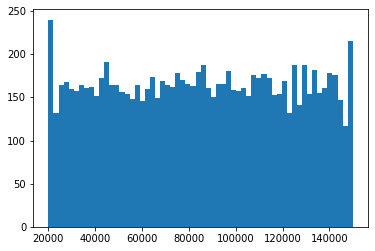

In [48]:
# histogram
plt.hist(survey['salary'], bins=60)
plt.show()

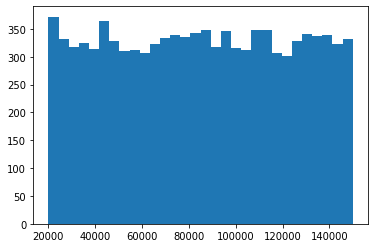

In [54]:
# histogram
plt.hist(survey['salary'], bins=30)
plt.show()

## Credit

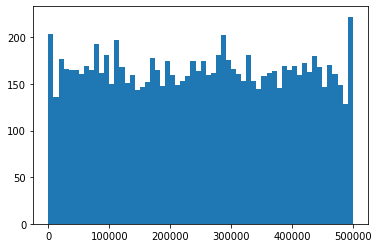

In [55]:
# histogram
plt.hist(survey['credit'], bins=60)
plt.show()

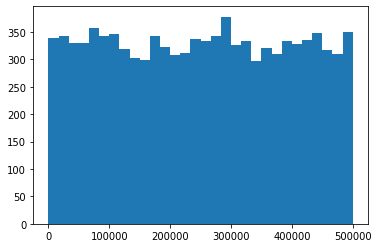

In [56]:
# histogram
plt.hist(survey['credit'], bins=30)
plt.show()

## Education Level

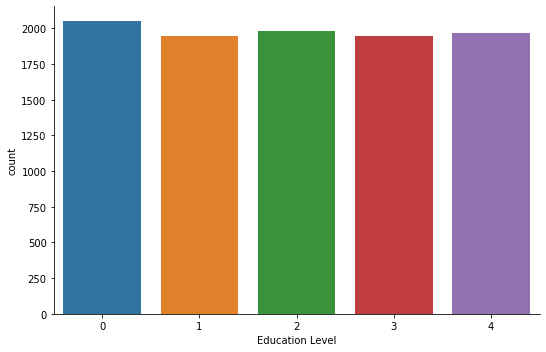

In [14]:
# plot gender count of customers
fg = sns.catplot('elevel', data=survey, kind='count', aspect=1.5)
fg.set_xlabels('Education Level')

## Car

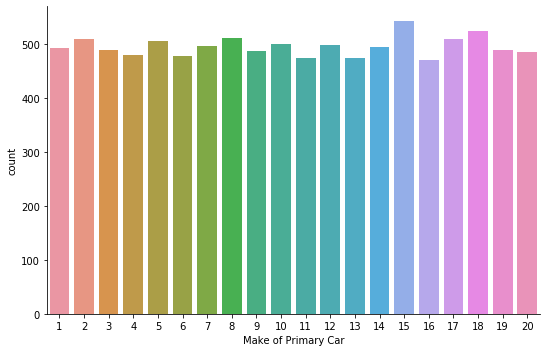

In [58]:
# plot gender count of customers
fg = sns.catplot('car', data=survey, kind='count', aspect=1.5)
fg.set_xlabels('Make of Primary Car')

## Zipcode

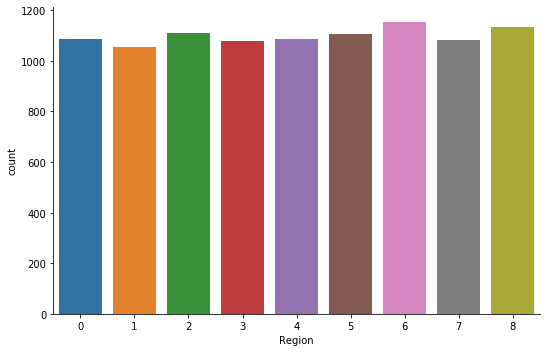

In [60]:
# plot gender count of customers
fg = sns.catplot('zipcode', data=survey, kind='count', aspect=1.5)
fg.set_xlabels('Region')

## Brand

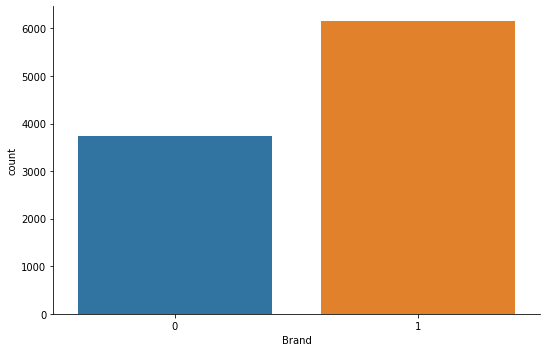

In [61]:
# plot gender count of customers
fg = sns.catplot('brand', data=survey, kind='count', aspect=1.5)
fg.set_xlabels('Brand')

# Multivariate Analysis

## Plot all Predictor Variables against Target Variable

### Plot Numerical Predictor Variables Against Target

Plot density of numerical variables by brand preference using kernal density plots. 

source: https://datavizcatalogue.com/methods/density_plot.html
good read: http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/

#### Age

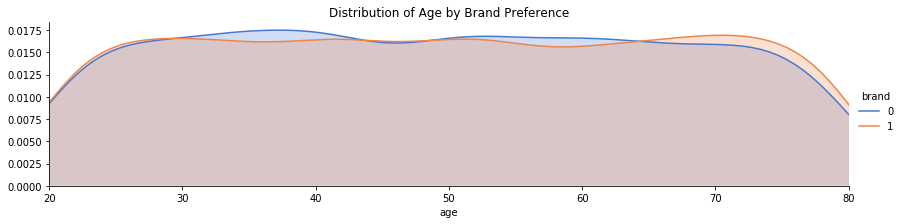

In [93]:
# Age vs Brand
fig = sns.FacetGrid(survey, hue='brand', aspect=4, palette = 'muted')
fig.map(sns.kdeplot, 'age', shade=True, cbar = False)
youngest = survey['age'].min()
oldest = survey['age'].max()
fig.set(xlim=(youngest,oldest))
fig.set(title='Distribution of Age by Brand Preference')
fig.add_legend()

#### Salary

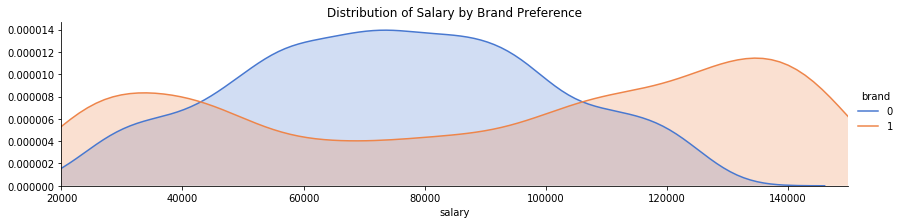

In [94]:
# Salary vs Brand
fig = sns.FacetGrid(survey, hue='brand', aspect=4, palette = 'muted')
fig.map(sns.kdeplot, 'salary', shade=True, cbar = False)
smallest = survey['salary'].min()
largest = survey['salary'].max()
fig.set(xlim=(smallest,largest))
fig.set(title='Distribution of Salary by Brand Preference')
fig.add_legend()

#### Credit

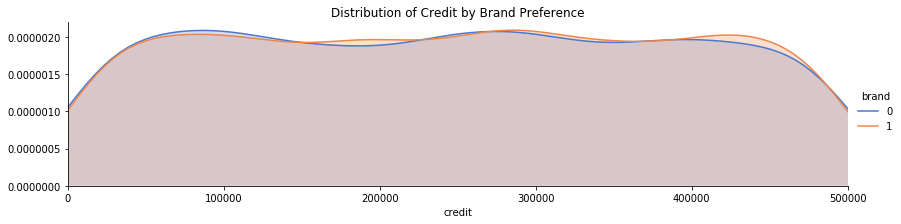

In [98]:
# Credit vs Brand
fig = sns.FacetGrid(survey, hue='brand', aspect=4, palette = 'muted')
fig.map(sns.kdeplot, 'credit', shade=True, cbar = False)
smallest = survey['credit'].min()
largest = survey['credit'].max()
fig.set(xlim=(smallest,largest))
fig.set(title='Distribution of Credit by Brand Preference')
fig.add_legend()

### Plot Categorical Predictor Variables Against Target

#### Education Level

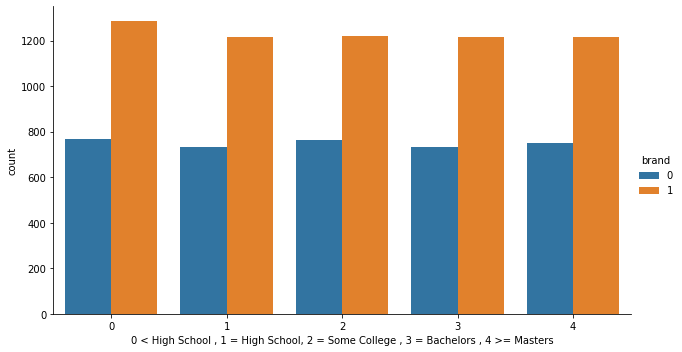

In [102]:
# Education vs Brand Chart
fg = sns.catplot('elevel', data=survey, hue='brand', kind='count', aspect=1.75)
fg.set_xlabels('0 < High School , 1 = High School, 2 = Some College , 3 = Bachelors , 4 >= Masters')

#### Car

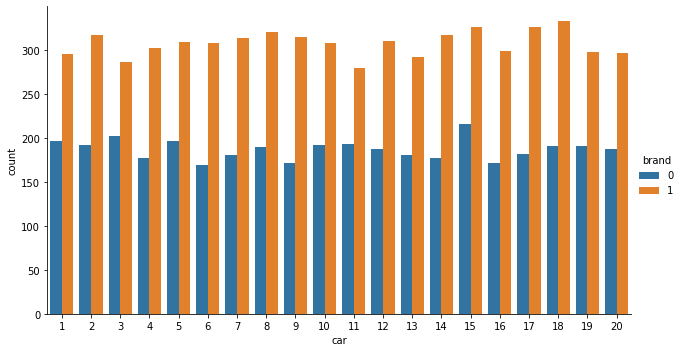

In [103]:
# Car vs Brand Chart
fg = sns.catplot('car', data=survey, hue='brand', kind='count', aspect=1.75)
#fg.set_xlabels('')

#### Region

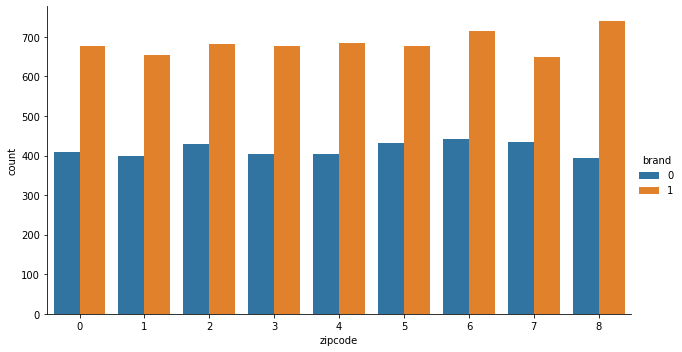

In [105]:
# Region vs Brand Chart
fg = sns.catplot('zipcode', data=survey, hue='brand', kind='count', aspect=1.75)
#fg.set_xlabels('0 < High School , 1 = High School, 2 = Some College , 3 = Bachelors , 4 >= Masters')